#Generate Captions for your Picture with OpenClip

Repos:
https://github.com/mlfoundations/open_clip &
https://github.com/robgon-art/open-clip

Article: https://towardsdatascience.com/using-openclip-for-image-search-and-automatic-captioning-fa1cbbd48ce4

In [ ]:
!pip install open_clip_torch transformers

In [ ]:
#loading the model
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [ ]:
from google.colab import files

uploaded = files.upload()

# To confirm the file names uploaded
for filename in uploaded.keys():
    print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes.")

Saving physalis.jpeg to physalis (1).jpeg
Uploaded file 'physalis (1).jpeg' with length 117086 bytes.


In [ ]:
file_path_colab=f"/content/{filename}"

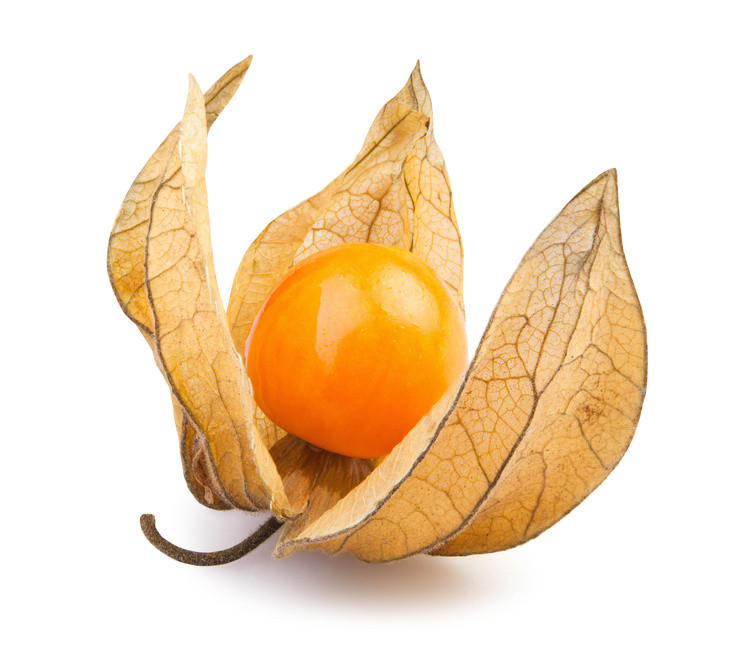

In [ ]:
#show image
from IPython.display import Image
Image(file_path_colab, width=500)

In [ ]:
#generate the caption for the picture
from PIL import Image
im = Image.open(file_path_colab).convert("RGB")
im = transform(im).unsqueeze(0)

with torch.no_grad(), torch.cuda.amp.autocast():
  generated = model.generate(im)

new_caption = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "")[:-2]

In [ ]:
#print the caption for the picture
print(new_caption)

an image of an orange fruit inside of a leaf 


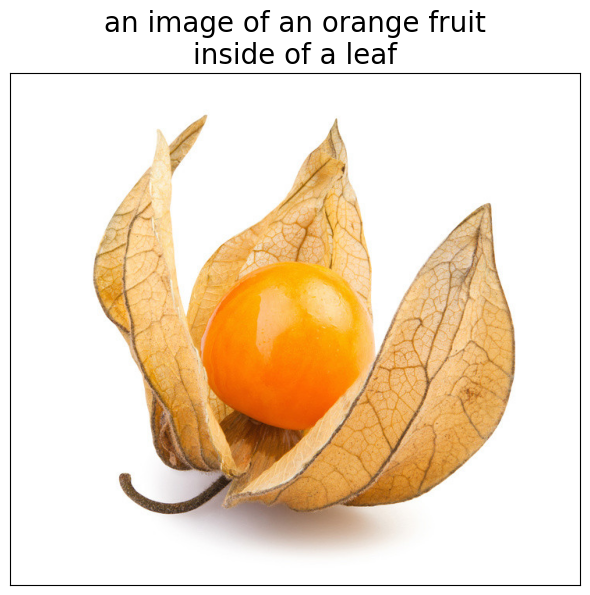

In [ ]:
import matplotlib.pyplot as plt
import textwrap
from PIL import Image

# Plotting the image with the new caption
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
image = Image.open(file_path_colab).convert("RGB")
plt.imshow(image)
description_wrapped = "\n".join(textwrap.wrap(new_caption, width=30))
plt.title(description_wrapped, size=20, y=1)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
